<a href="https://colab.research.google.com/github/zahra75koosha/zahra-koosha/blob/master/hoda%20cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 uninstall tensorflow
!pip3 install tensorflow.gpu==2.0.0

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/hoda dataset
%ls

/content/drive/My Drive/hoda dataset
 hoda_dataset_helper.py  'Test 20000.cdb'
 RemainingSamples.cdb    'Train 60000.cdb'


In [0]:
from hoda_dataset_helper import read_hoda
from hoda_dataset_helper import __read_hoda_cdb
from hoda_dataset_helper import __read_hoda_dataset

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau





 Load Dataset

In [0]:
# Reading train dataset 
X_train, Y_train = __read_hoda_dataset(dataset_path='./Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=True, # set one hot= True to encode training_label to one hot vector
                                reshape=True)

In [0]:
# reading test dataset
X_test, Y_test = __read_hoda_dataset(dataset_path='./Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=True,
                              reshape=False)

In [0]:
# Reading remain samples dataset 
X_remain, Y_remain = __read_hoda_dataset('./RemainingSamples.cdb',
                                             images_height=32,
                                             images_width=32,
                                             one_hot=True,
                                             reshape=True)

In [0]:
# reading train image
train_images, train_labels = __read_hoda_cdb('./Train 60000.cdb')

In [0]:
# reading test image
test_images, test_labels = __read_hoda_cdb('./Test 20000.cdb')

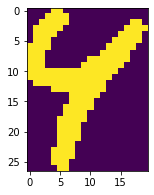

In [208]:
# plot a data sample
fig = plt.figure(figsize=(15, 3))
plt.imshow(train_images[0])

Data Preprocessing

In [0]:
#normalization
X_train =X_train / 255.0
X_test = X_test /255.0


In [0]:
# reshape the train_samples to 3 dimension
X_train=X_train.reshape(-1,32,32,1)


In [226]:
X_train.shape


(60000, 32, 32, 1)

In [227]:
Y_train.shape

(60000, 10)

In [228]:
X_test.shape

(20000, 32, 32, 1)

In [229]:
Y_test.shape

(20000, 10)

In [230]:
X_remain.shape

(22352, 1024)

In [231]:
Y_remain.shape

(22352, 10)

In [232]:
'''num_classes=10
class_name = ['0','1', '2','3','4','5','6','7','8','9']
sample_per_class= 5
plt.figure(figsize=(16,8))'''

'''for cls, name in  enumerate(class_name):
  idxs= np.flatnonzero(train_labels == cls)
  idxs= np.random.choice(idxs, sample_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(sample_per_class, num_classes, i, num_classes+ cls +1)
    plt.imshow(train_images[idx], interpolation='spline16')
    plt.axis('off')
    if i== 0:
      plt.title(class_name[cls])'''



"for cls, name in  enumerate(class_name):\n  idxs= np.flatnonzero(train_labels == cls)\n  idxs= np.random.choice(idxs, sample_per_class, replace=False)\n  for i, idx in enumerate(idxs):\n    plt.subplot(sample_per_class, num_classes, i, num_classes+ cls +1)\n    plt.imshow(train_images[idx], interpolation='spline16')\n    plt.axis('off')\n    if i== 0:\n      plt.title(class_name[cls])"

In [0]:
# split training dataset to validation and train samples
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val= train_test_split(X_train,Y_train,test_size=0.2, random_state=1)

In [241]:
X_val.shape


(8640, 32, 32, 1)

In [242]:
Y_val.shape

(8640, 10)